# Стохастический градиентный и координатный спуски

Для каждого задания указано количество баллов (если они оцениваются отдельно) + 1 балл за аккуратное и полное выполнение всего задания

## Загрузка и подготовка данных

**Загрузите уже знакомый вам файл *Advertising.csv* как объект DataFrame.** 

In [1272]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [1273]:
#ваш код 
df = pd.read_csv('C:\VS Code\Advertising (1)/Advertising.csv',index_col=0)
df.head(5)

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


**Проверьте, есть ли в данных пропуски и, если они есть - удалите их**

In [1274]:
# пропусков нет
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


**Преобразуйте ваши признаки в массивы NumPy и разделите их на переменные X (предикторы) и y(целевая переменная)** 

In [1275]:
# Целевая переменная это признак 'sales' остальные переменные ('TV', 'radio', 'newspaper') являются предикторами. 
X = df.drop('sales', axis=1)
y = df['sales']
X = X.to_numpy ()
y = y.to_numpy ()


## Координатный спуск (3 балла)

**Добавим единичный столбец для того, чтобы у нас был свободный коэффициент в уравнении регрессии:**

In [1276]:


X = np.hstack([np.ones(X.shape[0]).reshape(-1, 1), X])
y = y.reshape(-1, 1)
print(X.shape, y.shape)

(200, 4) (200, 1)


**Нормализуем данные: обычно это необходимо для корректной работы алгоритма**

In [1277]:
Xnorm = X / np.sqrt(np.sum(np.square(X), axis=0))

**Реализуйте алгоритм координатного спуска:** (3 балла)

Ниже приведен алгоритм координатного спуска для случая нормализованных данных:

**Задано:**

* $X=(x_{ij})$ - матрица наблюдений, размерностью $dim(X)=(m, n)$
* $N=1000$ - количество итераций

**Примечание:** *1000 итераций здесь указаны для этого задания, на самом деле их может быть намного больше, нет детерменированного значения.*

**Алгоритм (математическая запись):**
* Создать нулевой вектор параметров $w_0=(0, 0,..., 0)^T$
* Для всех $t=1, 2, ..., N$ итераций:
    * Для всех $k = 1, 2,..., n$:
        * Фиксируем значение всех признаков, кроме $k$-ого и вычисляем прогноз модели линейной регрессии.Для этого исключаем признак $k$-ый из данных и $w_j$ из параметров при построении прогноза.
        Математически это можно записать следующим образом:

        $$h_i = \sum_{j=1}^{k-1} x_{ij}w_{j} + \sum_{j=k+1}^{n} x_{ij}w_j $$

        **Примечание:**
        
        *Обратите, что в данной записи текущий признак под номером $k$ не участвует в сумме.Сравните эту запись с классической записью прогноза линейной регрессии в случае нормированных данных (когда участвуют все признаки):*

        $$h_i = \sum_{j=1}^{n} x_{ij}w_{j}$$ 
        
        * Вычисляем новое значение параметра $k$-ого коэффициента: 
        $$w_k = \sum_{i=1}^{m} x_{ik} (y_i - h_i) = x_k^T(y-h) $$

    * Вычисляем значение функции потерь и сохраняем в историю изменения функции потерь (В оценке функции потерь участвуют все признаки):
        $$\hat{y_i} = \sum_{j=1}^{n}x_{ij}w_j$$
        $$Loss_t = \frac{1}{n} \sum_{i=1}^{m}(y_i-\hat{y_i})^2$$
        
        или в векторном виде:
        
        $$\hat{y} = Xw$$
        $$Loss_t = \frac{1}{n}(y-\hat{y})^T(y-\hat{y})$$
    



**Алгоритм (псевдокод):**
```python

num_iters = #количество итераций
m = # количество строк в матрице X
n = # количество столбцов в матрице X
w = #вектор размера nx1, состояющий из нулей

for i in range(num_iters):
    for k in range(n):
        # Вычисляем прогноз без k-ого фактора
        h = (X[:,0:k] @ w[0:k]) + (X[:,k+1:] @ w[k+1:])
        # Обновляем новое значение k-ого коэффициента
        w[k] =  (X[:,k].T @ (y - h))
        # Вычисляем функцию потерь
        cost = sum((X @ w) - y) ** 2)/(len(y))

```

Вам необходимо реализовать координатный спуск, и вывести веса в модели линейной регрессии.

In [1278]:
# ваш код 
num_iters = 1000 #количество итераций
m = Xnorm.shape[0] # количество строк в матрице X
n = Xnorm.shape[1] # количество столбцов в матрице X
w = np.zeros((n,1)) #вектор размера nx1, состояющий из нулей

for i in range(num_iters):
    for k in range(n):
        # Вычисляем прогноз без k-ого фактора
        h = (Xnorm[:,0:k] @ w[0:k]) + (Xnorm[:,k+1:] @ w[k+1:])
        # Обновляем новое значение k-ого коэффициента
        w[k] =  (Xnorm[:,k].T @ (y - h))
        # Вычисляем функцию потерь
        cost = sum((Xnorm @ w) - y) ** 2/(len(y))
print(w)
       

[[ 41.56217205]
 [110.13144155]
 [ 73.52860638]
 [ -0.55006384]]


Сравните результаты с реализацией линейной регрессии из библиотеки sklearn:

In [1279]:
model = LinearRegression(fit_intercept=False)
model.fit(Xnorm, y)
 
print(model.coef_)

[[ 41.56217205 110.13144155  73.52860638  -0.55006384]]


Если вы все сделали верно, они должны практически совпасть!

## Стохастический градиентный спуск (6 баллов)

**Отмасштабируйте столбцы исходной матрицы *X* (которую мы не нормализовали еще!). Для того, чтобы это сделать, надо вычесть из каждого значения среднее и разделить на стандартное отклонение** (0.5 баллов)

In [1280]:
#ваш код
X = df.drop('sales', axis=1)
y = df['sales']
X = X.to_numpy ()
y = y.to_numpy ()

# Рассчитываем среднее значение и стандартное отклонение для каждого столбца
mean = np.mean(X, axis=0)
std = np.std(X, axis=0)

# Масштабируем столбцы исходной матрицы X
X_scaled = (X - mean) / std

**Добавим единичный столбец**

In [1281]:
X = np.hstack([np.ones(X.shape[0]).reshape(-1, 1), X_scaled])

**Создайте функцию mse_error для вычисления среднеквадратичной ошибки, принимающую два аргумента: реальные значения и предсказывающие, и возвращающую значение mse** (0.5 балла)

In [1282]:
#ваш код
def mse_error(y, y_pred):
    difference = y_pred - y
    mse = np.mean(difference ** 2)
    return mse

**Сделайте наивный прогноз: предскажите продажи средним значением. После этого рассчитайте среднеквадратичную ошибку для этого прогноза** (0.5 балла)

In [1283]:
#ваш код
y_mean = y.mean()
print(mse_error(y, y_mean))

27.085743750000002


**Создайте функцию *lin_pred*, которая может по матрице предикторов *X* и вектору весов линейной модели *w* получить вектор прогнозов** (0.5 балла)

In [1284]:
#ваш код
def lin_pred(X, param):
    y_pred = np.dot(X, param)
    return y_pred

**Создайте функцию *stoch_grad_step* для реализации шага стохастического градиентного спуска. (1.5 балла) 
Функция должна принимать на вход следующие аргументы:**
* матрицу *X*
* вектора *y* и *w*
* число *train_ind* - индекс объекта обучающей выборки (строки матрицы *X*), по которому считается изменение весов
* число *$\eta$* (eta) - шаг градиентного спуска

Результатом будет вектор обновленных весов

Шаг для стохастического градиентного спуска выглядит следующим образом:

$$\Large w_j \leftarrow w_j - \frac{2\eta}{\ell} \sum_{i=1}^\ell{{x_{ij}((w_0 + w_1x_{i1} + w_2x_{i2} +  w_3x_{i3}) - y_i)}}$$

Для того, чтобы написать функцию, нужно сделать следующее:
    
*  посчитать направление изменения: умножить объект обучающей выборки на 2 и на разницу между предсказанным значением и реальным, а потом поделить на количество элементов в выборке.
* вернуть разницу между вектором весов и направлением изменения, умноженным на шаг градиентного спуска

In [1285]:
#ваш код
def stoch_grad_step(X, y, w, train_ind, eta):
    '''
    В данной функции stoch_grad_step мы получаем на вход матрицу признаков X, 
    целевую переменную y, вектор весов w, индекс объекта обучающей выборки (train_ind), 
    а также параметр, определяющий шаг обучения (eta). Мы вычисляем предсказание (y_pred), 
    ошибку, а затем направление изменения весов на основе обучающего объекта. 
    Наконец, обновляем веса и возвращаем их.
    '''
    
    x_i = X[train_ind]
    y_i = y[train_ind]
    y_pred = lin_pred(x_i, w)
    error = y_pred - y_i
    gradient_direction = (2 * eta / len(y)) * (x_i * error)
    w = w - gradient_direction
    return w

**Создайте функцию *stochastic_gradient_descent*, для реализации стохастического градиентного спуска (2.5 балла)**

**Функция принимает на вход следующие аргументы:**
- Матрицу признаков X
- Целевую переменнную
- Изначальную точку (веса модели)
- Параметр, определяющий темп обучения
- Максимальное число итераций
- Евклидово расстояние между векторами весов на соседних итерациях градиентного спуска,при котором алгоритм прекращает работу 

**На каждой итерации в вектор (список) должно записываться текущее значение среднеквадратичной ошибки. Функция должна возвращать вектор весов $w$, а также вектор (список) ошибок.**

Алгоритм сследующий:
    
* Инициализируйте расстояние между векторами весов на соседних итерациях большим числом (можно бесконечностью)
* Создайте пустой список для фиксации ошибок
* Создайте счетчик итераций
* Реализуйте оновной цикл обучения пока расстояние между векторами весов больше того, при котором надо прекратить работу (когда расстояния станут слишком маленькими - значит, мы застряли в одном месте) и количество итераций меньше максимально разрешенного: сгенерируйте случайный индекс, запишите текущую ошибку в вектор ошибок, запишите в переменную текущий шаг стохастического спуска с использованием функции, написанной ранее. Далее рассчитайте текущее расстояние между векторами весов и прибавьте к счетчику итераций 1.
* Верните вектор весов и вектор ошибок

In [1286]:
# ваш код
def stochastic_gradient_descent(X, y, initial_weights, learning_rate, max_iters, min_weight_distance):
    weight_distance = float('inf')  # Инициализация расстояния между весами на соседних итерациях
    
    errors = []  # Список для фиксации ошибок
    iter_count = 0  # Счетчик итераций
    
    while weight_distance > min_weight_distance and iter_count < max_iters:
        train_ind = np.random.randint(X.shape[0])  # Случайный выбор индекса из обучающей выборки
        current_error = mse_error(lin_pred(X, initial_weights), y)  # Вычисление текущей ошибки
        errors.append(current_error)  # Запись текущей ошибки
       
        updated_weights = stoch_grad_step(X, y, initial_weights, train_ind, learning_rate)
        weight_distance = np.linalg.norm(updated_weights - initial_weights)  # Вычисление расстояния между весами
        initial_weights = updated_weights  # Обновление весов
        iter_count += 1  # Увеличение счетчика итераций
        
    return initial_weights, errors


 **Запустите $10^5$ итераций стохастического градиентного спуска. Укажите вектор начальных весов, состоящий из нулей. Можете поэкспериментировать с параметром, отвечающим за темп обучения.**

**Постройте график зависимости ошибки от номера итерации**

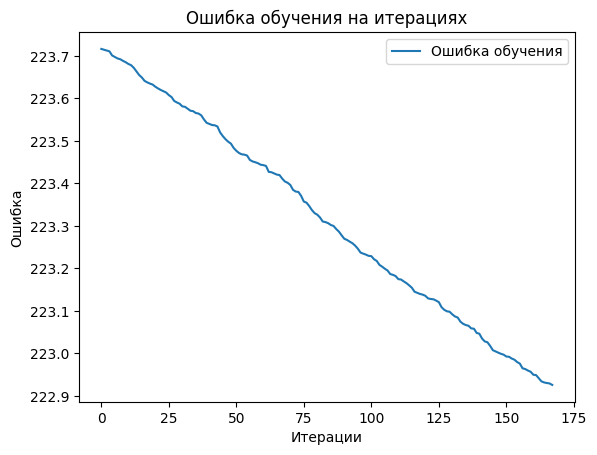

In [1287]:
# ваш код
# Начальные веса модели
initial_weights = np.zeros(X.shape[1])  # Начальные веса заданы нулями

# Задаем гиперпараметры
learning_rate = 0.001
max_iters = 10**5
min_weight_distance = 0.0001

# Обучаем модель
final_weights, errors = stochastic_gradient_descent(X, y, initial_weights, learning_rate, max_iters, min_weight_distance)

# Визуализация обучения (изменение среднеквадратичной ошибки на каждой итерации)
plt.plot(range(len(errors)), errors, label='Ошибка обучения')
plt.xlabel('Итерации')
plt.ylabel('Ошибка')
plt.title('Ошибка обучения на итерациях')
plt.legend()
plt.show()

**Выведите вектор весов, к которому сошелся метод.**

In [1288]:
# ваш код
print(f'Финальные веса модели: {final_weights}')


Финальные веса модели: [0.0243789  0.00938582 0.00424908 0.00274903]


**Выведите среднеквадратичную ошибку на последней итерации.**

In [1289]:
print(f'Cреднеквадратичная ошибка на последней итерации: {mse_error(y, lin_pred(X, final_weights))}')

Cреднеквадратичная ошибка на последней итерации: 222.92483020793262
